In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/microsoft-catsvsdogs-dataset/readme[1].txt
/kaggle/input/microsoft-catsvsdogs-dataset/MSR-LA - 3467.docx
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7981.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6234.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/1269.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3863.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6241.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10304.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/623.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2193.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11925.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3750.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11378.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2008.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10730.jpg
/kaggle/input/micros

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import shutil
import numpy as np
from tqdm import tqdm

# Original dataset directory
dataset_dir = '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages'

# Step 1: Find and filter out corrupted images
print("Checking for corrupted images...")
bad_img = []

cat_dir = os.path.join(dataset_dir, 'Cat')
for f in tqdm(os.listdir(cat_dir), desc='Checking cats'):
    if f.endswith('.jpg'):
        img_path = os.path.join(cat_dir, f)
        try:
            img_bytes = tf.io.read_file(img_path)
            img = tf.image.decode_jpeg(img_bytes)
        except:
            bad_img.append(img_path)

dog_dir = os.path.join(dataset_dir, 'Dog')
for f in tqdm(os.listdir(dog_dir), desc='Checking dogs'):
    if f.endswith('.jpg'):
        img_path = os.path.join(dog_dir, f)
        try:
            img_bytes = tf.io.read_file(img_path)
            img = tf.image.decode_jpeg(img_bytes)
        except:
            bad_img.append(img_path)

print(f"Found {len(bad_img)} corrupted images")

# Step 2: Create clean dataset with train/val/test splits
output_dir = '/kaggle/working/clean_dataset'
classes = ['Cat', 'Dog']
splits = ['train', 'val', 'test']
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Create directory structure
for split in splits:
    for cls in classes:
        os.makedirs(os.path.join(output_dir, split, cls), exist_ok=True)

# Process each class
for cls in classes:
    print(f"\nProcessing {cls} images...")
    class_dir = os.path.join(dataset_dir, cls)
    
    # Get all valid images
    valid_images = []
    for f in os.listdir(class_dir):
        if f.endswith('.jpg'):
            img_path = os.path.join(class_dir, f)
            if img_path not in bad_img:
                valid_images.append(f)
    
    # Shuffle and split
    np.random.seed(42)  # For reproducibility
    np.random.shuffle(valid_images)
    
    num_total = len(valid_images)
    num_train = int(train_ratio * num_total)
    num_val = int(val_ratio * num_total)
    
    train_files = valid_images[:num_train]
    val_files = valid_images[num_train:num_train + num_val]
    test_files = valid_images[num_train + num_val:]
    
    print(f"{cls}: {len(train_files)} train, {len(val_files)} val, {len(test_files)} test")
    
    # Copy files to respective directories
    for f in tqdm(train_files, desc=f'{cls} train'):
        src = os.path.join(class_dir, f)
        dst = os.path.join(output_dir, 'train', cls, f)
        shutil.copy(src, dst)
    
    for f in tqdm(val_files, desc=f'{cls} val'):
        src = os.path.join(class_dir, f)
        dst = os.path.join(output_dir, 'val', cls, f)
        shutil.copy(src, dst)
    
    for f in tqdm(test_files, desc=f'{cls} test'):
        src = os.path.join(class_dir, f)
        dst = os.path.join(output_dir, 'test', cls, f)
        shutil.copy(src, dst)

# Step 3: Create datasets
print("\nCreating TensorFlow datasets...")
train_ds = keras.utils.image_dataset_from_directory(
    os.path.join(output_dir, 'train'),
    label_mode="int",  # Changed to int for SparseCategoricalCrossentropy
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=123
)

val_ds = keras.utils.image_dataset_from_directory(
    os.path.join(output_dir, 'val'),
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,  # No shuffle for validation
    seed=123
)

test_ds = keras.utils.image_dataset_from_directory(
    os.path.join(output_dir, 'test'),
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,  # No shuffle for testing
    seed=123
)

    


2025-11-15 15:08:23.767288: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763219303.937035      48 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763219303.995064      48 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Checking for corrupted images...


Checking cats:   0%|          | 0/12501 [00:00<?, ?it/s]I0000 00:00:1763219320.021612      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1763219320.022288      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
Checking dogs: 100%|██████████| 12501/12501 [02:12<00:00, 94.62it/s] 


Found 176 corrupted images

Processing Cat images...
Cat: 8698 train, 1864 val, 1865 test


Cat test: 100%|██████████| 1865/1865 [00:04<00:00, 375.72it/s]



Processing Dog images...
Dog: 8677 train, 1859 val, 1861 test


Dog test: 100%|██████████| 1861/1861 [00:02<00:00, 695.47it/s]



Creating TensorFlow datasets...
Found 17375 files belonging to 2 classes.
Found 3723 files belonging to 2 classes.
Found 3726 files belonging to 2 classes.


In [21]:
img_shp=[]
for image ,label in train_ds.take(1):
    img_shp = image[0]




In [23]:
shape=np.array(img_shp).shape


(224, 224, 3)

In [ ]:

# Compile
model.compile(
    optimizer="adam",
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Example: fitting with batch size 32
history = model.fit(train_ds, epochs=10, validation_data=val_ds)


In [67]:
tf.keras.backend.clear_session()


In [68]:
model = keras.Sequential([
    keras.layers.Input(shape=(224,224,3)),  # use hard shape
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),

    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2, activation='softmax')
])

model.build((None, 224, 224, 3))
model.summary()





Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 524,994 (2.00 MB)

 Trainable params: 523,010 (2.00 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [70]:

# Compile
model.compile(
    optimizer="adam",
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Example: fitting with batch size 32
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

   

Epoch 1/10
 84/543 ━━━━━━━━━━━━━━━━━━━━ 26s 58ms/step - accuracy: 0.5652 - loss: 0.9764

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


105/543 ━━━━━━━━━━━━━━━━━━━━ 25s 59ms/step - accuracy: 0.5661 - loss: 0.9496

166/543 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.5705 - loss: 0.9006

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


268/543 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.5779 - loss: 0.8561

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


286/543 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.5788 - loss: 0.8504

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


316/543 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.5803 - loss: 0.8418

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


471/543 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.5866 - loss: 0.8086

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


490/543 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.5872 - loss: 0.8055

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


495/543 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.5873 - loss: 0.8048

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


543/543 ━━━━━━━━━━━━━━━━━━━━ 49s 75ms/step - accuracy: 0.5889 - loss: 0.7975 - val_accuracy: 0.5708 - val_loss: 1.0213
Epoch 2/10
 89/543 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - accuracy: 0.6457 - loss: 0.6426

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 99/543 ━━━━━━━━━━━━━━━━━━━━ 26s 60ms/step - accuracy: 0.6455 - loss: 0.6425

175/543 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.6470 - loss: 0.6404

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


260/543 ━━━━━━━━━━━━━━━━━━━━ 17s 60ms/step - accuracy: 0.6490 - loss: 0.6373

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


300/543 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - accuracy: 0.6504 - loss: 0.6358

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


317/543 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - accuracy: 0.6508 - loss: 0.6352

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


471/543 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.6561 - loss: 0.6287

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


483/543 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6565 - loss: 0.6283

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


500/543 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6570 - loss: 0.6278

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


543/543 ━━━━━━━━━━━━━━━━━━━━ 35s 64ms/step - accuracy: 0.6582 - loss: 0.6266 - val_accuracy: 0.6108 - val_loss: 0.8424
Epoch 3/10
 78/543 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.7103 - loss: 0.5717

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


110/543 ━━━━━━━━━━━━━━━━━━━━ 25s 59ms/step - accuracy: 0.7074 - loss: 0.5740

159/543 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.7052 - loss: 0.5746

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


287/543 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.7031 - loss: 0.5744

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


291/543 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.7031 - loss: 0.5743

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


325/543 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.7035 - loss: 0.5738

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


468/543 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.7061 - loss: 0.5704

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


483/543 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.7064 - loss: 0.5700

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


543/543 ━━━━━━━━━━━━━━━━━━━━ 34s 63ms/step - accuracy: 0.7074 - loss: 0.5688 - val_accuracy: 0.5866 - val_loss: 1.9078
Epoch 4/10
 83/543 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.7163 - loss: 0.5699

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


105/543 ━━━━━━━━━━━━━━━━━━━━ 25s 59ms/step - accuracy: 0.7168 - loss: 0.5670

191/543 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.7214 - loss: 0.5579

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


273/543 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.7253 - loss: 0.5510

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


286/543 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.7258 - loss: 0.5502

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


361/543 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.7283 - loss: 0.5464

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


469/543 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.7309 - loss: 0.5423

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


483/543 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.7311 - loss: 0.5420

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


494/543 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.7313 - loss: 0.5417

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


543/543 ━━━━━━━━━━━━━━━━━━━━ 34s 63ms/step - accuracy: 0.7320 - loss: 0.5404 - val_accuracy: 0.7223 - val_loss: 0.5980
Epoch 5/10
 90/543 ━━━━━━━━━━━━━━━━━━━━ 26s 59ms/step - accuracy: 0.7360 - loss: 0.5311

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


108/543 ━━━━━━━━━━━━━━━━━━━━ 25s 59ms/step - accuracy: 0.7368 - loss: 0.5283

161/543 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.7398 - loss: 0.5219

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


287/543 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.7461 - loss: 0.5117

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


314/543 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.7469 - loss: 0.5103

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


467/543 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.7503 - loss: 0.5046

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


483/543 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.7506 - loss: 0.5042

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


543/543 ━━━━━━━━━━━━━━━━━━━━ 34s 63ms/step - accuracy: 0.7515 - loss: 0.5029 - val_accuracy: 0.6240 - val_loss: 0.7912
Epoch 6/10
 75/543 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.7538 - loss: 0.5127

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


111/543 ━━━━━━━━━━━━━━━━━━━━ 25s 59ms/step - accuracy: 0.7572 - loss: 0.5052

160/543 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.7612 - loss: 0.4967

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


277/543 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.7687 - loss: 0.4825

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


302/543 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.7697 - loss: 0.4809

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


324/543 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.7705 - loss: 0.4795

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


476/543 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.7753 - loss: 0.4727

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


488/543 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.7756 - loss: 0.4723

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


543/543 ━━━━━━━━━━━━━━━━━━━━ 34s 63ms/step - accuracy: 0.7766 - loss: 0.4708 - val_accuracy: 0.7819 - val_loss: 0.4876
Epoch 7/10
 81/543 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.8074 - loss: 0.4181

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


119/543 ━━━━━━━━━━━━━━━━━━━━ 24s 59ms/step - accuracy: 0.8049 - loss: 0.4226

167/543 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.8055 - loss: 0.4223

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


266/543 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.8084 - loss: 0.4178

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


288/543 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.8091 - loss: 0.4169

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


314/543 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.8098 - loss: 0.4159

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


466/543 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.8131 - loss: 0.4111

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


482/543 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8133 - loss: 0.4108

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


486/543 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8133 - loss: 0.4107

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


543/543 ━━━━━━━━━━━━━━━━━━━━ 34s 63ms/step - accuracy: 0.8141 - loss: 0.4097 - val_accuracy: 0.7808 - val_loss: 0.4736
Epoch 8/10
 76/543 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.8388 - loss: 0.3574

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


104/543 ━━━━━━━━━━━━━━━━━━━━ 25s 59ms/step - accuracy: 0.8392 - loss: 0.3584

162/543 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.8411 - loss: 0.3579

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


260/543 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.8420 - loss: 0.3563

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


296/543 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.8419 - loss: 0.3560

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


315/543 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.8420 - loss: 0.3558

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


479/543 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8428 - loss: 0.3539

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


497/543 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.8429 - loss: 0.3538

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


543/543 ━━━━━━━━━━━━━━━━━━━━ 35s 64ms/step - accuracy: 0.8430 - loss: 0.3536 - val_accuracy: 0.7636 - val_loss: 0.4576
Epoch 9/10
 85/543 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.8767 - loss: 0.3076

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


103/543 ━━━━━━━━━━━━━━━━━━━━ 26s 59ms/step - accuracy: 0.8766 - loss: 0.3072

156/543 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.8764 - loss: 0.3062

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


262/543 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.8752 - loss: 0.3045

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


293/543 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.8750 - loss: 0.3042

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


326/543 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.8747 - loss: 0.3039

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


467/543 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.8731 - loss: 0.3046

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


488/543 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8729 - loss: 0.3048

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


492/543 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8729 - loss: 0.3049

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


543/543 ━━━━━━━━━━━━━━━━━━━━ 34s 63ms/step - accuracy: 0.8724 - loss: 0.3052 - val_accuracy: 0.8740 - val_loss: 0.2977
Epoch 10/10
 76/543 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.8827 - loss: 0.2832

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 98/543 ━━━━━━━━━━━━━━━━━━━━ 26s 59ms/step - accuracy: 0.8817 - loss: 0.2830

173/543 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.8823 - loss: 0.2781

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


264/543 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.8835 - loss: 0.2744

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


286/543 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.8837 - loss: 0.2739

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


324/543 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.8840 - loss: 0.2731

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


489/543 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8852 - loss: 0.2705

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


543/543 ━━━━━━━━━━━━━━━━━━━━ 35s 64ms/step - accuracy: 0.8854 - loss: 0.2702 - val_accuracy: 0.8974 - val_loss: 0.2598


In [71]:
model.evaluate(test_ds)


 20/117 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8413 - loss: 0.3852

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 51/117 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8512 - loss: 0.3678

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8666 - loss: 0.3320


[0.26780861616134644, 0.8947933316230774]

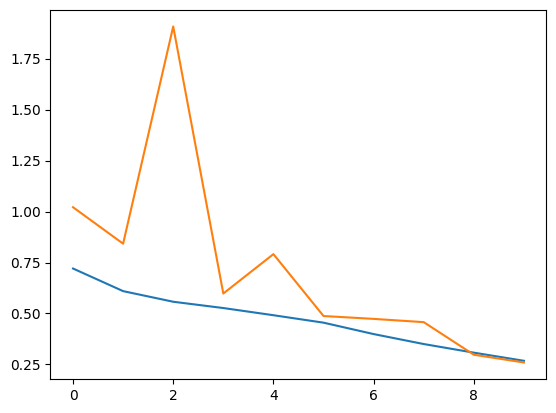

In [72]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

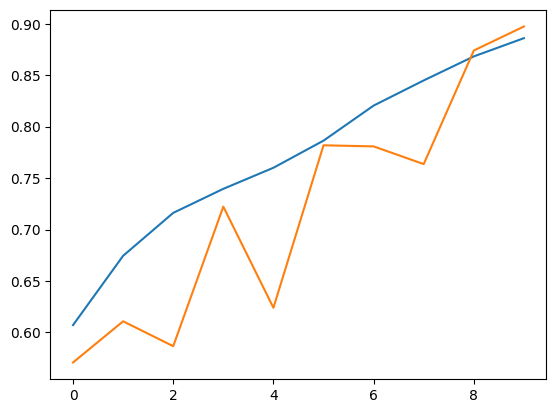

In [73]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


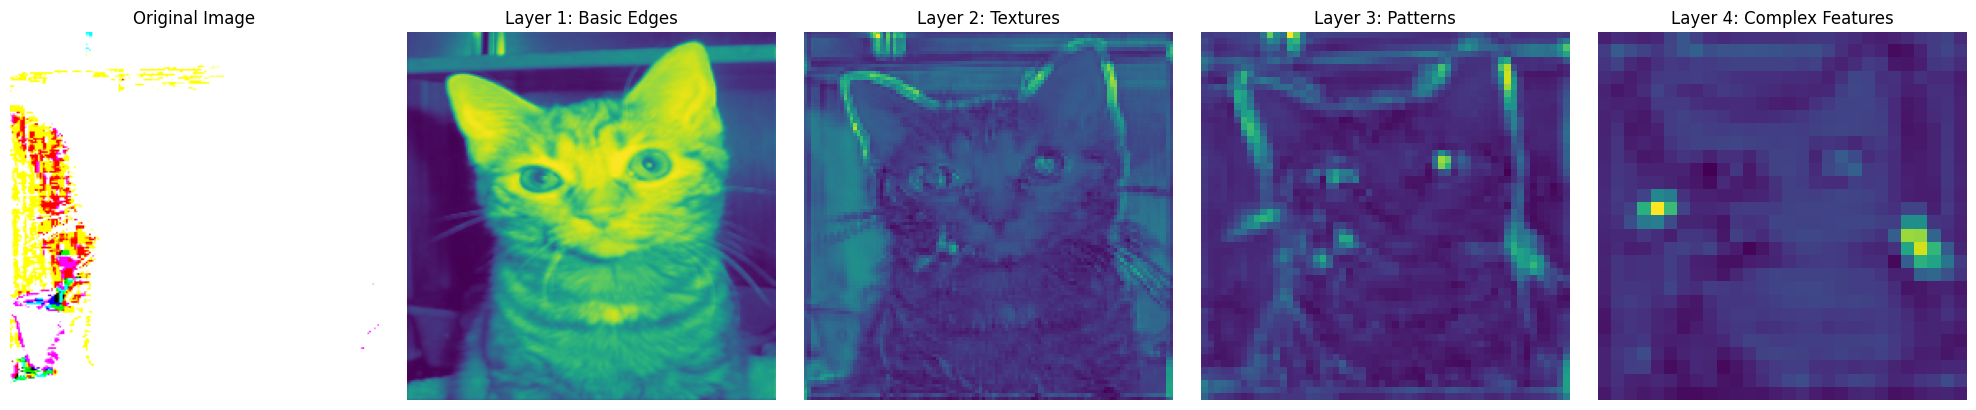

In [95]:
# Visualize how the SAME input image changes through different layers
def visualize_layer_progression(model, image):
    layer_names = ['conv2d', 'conv2d_1', 'conv2d_2', 'conv2d_3']
    layer_titles = ['Layer 1: Basic Edges', 'Layer 2: Textures', 
                    'Layer 3: Patterns', 'Layer 4: Complex Features']
    
    fig, axes = plt.subplots(1, len(layer_names) + 1, figsize=(20, 4))
    
    # Show original image
    axes[0].imshow(image[0])
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    # Show each layer's output
    for idx, (layer_name, title) in enumerate(zip(layer_names, layer_titles)):
        layer = model.get_layer(layer_name)
        intermediate_model = keras.Model(
            inputs=model.layers[0].input,
            outputs=layer.output
        )
        
        features = intermediate_model.predict(image)[0]
        
        # Average across ALL filters to show general activation
        avg_activation = np.mean(features, axis=-1)
        
        axes[idx + 1].imshow(avg_activation)
        axes[idx + 1].set_title(title)
        axes[idx + 1].axis('off')
    
    plt.tight_layout()
    plt.show()

# Use it
for images, labels in train_ds.take(1):
    single_image = images[0:1]
    visualize_layer_progression(model, single_image)

In [88]:
# Get the first convolutional layer
layer = model.get_layer('conv2d_3')

# For Sequential models, use the first layer's input
intermediate_model = keras.Model(
    inputs=model.layers[0].input,
    outputs=layer.output
)

In [89]:
img=[]
for image, label in train_ds.take(1):
    # Get output from the intermediate layer
    img = image[0]

In [90]:
img.shape

TensorShape([224, 224, 3])

In [91]:
single_image = np.expand_dims(img, axis=0)  # Add batch dimension: (1, 224, 224, 3)

# Get the feature maps from conv2d layer
features = intermediate_model.predict(single_image)
  # Will be (1, 224, 224, 32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


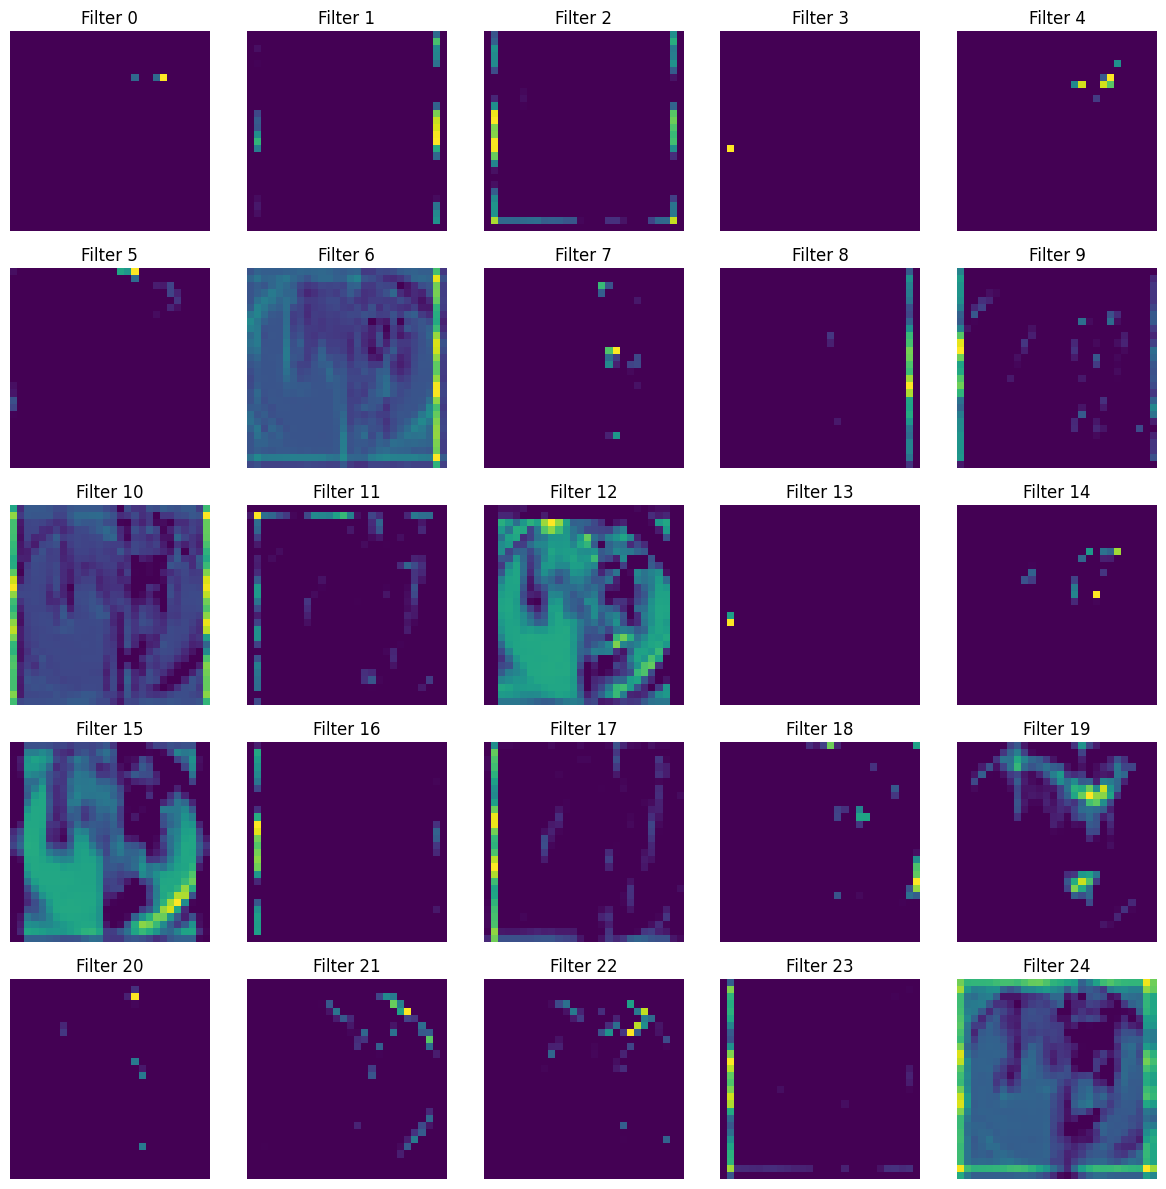

In [93]:

features_ = features[0] 
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    if i < 32:
        ax.imshow(features_[:, :, i], cmap='viridis')
        ax.set_title(f'Filter {i}')
        ax.axis('off')
plt.tight_layout()
plt.show()

In [62]:
model.build((None,) + np.array(img_shp).shape)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,571,016 (5.99 MB)

 Trainable params: 523,010 (2.00 MB)

 Non-trainable params: 1,984 (7.75 KB)

 Optimizer params: 1,046,022 (3.99 MB)

tf.Tensor(
[[[191.       183.55246  162.26508 ]
  [195.53516  194.55357  184.83482 ]
  [192.17467  198.01395  201.4336  ]
  ...
  [149.28238  141.6959   130.06764 ]
  [142.45259  136.2517   113.277405]
  [125.390854 119.12912   87.61806 ]]

 [[190.83426  184.91016  163.61105 ]
  [196.86942  197.05357  186.58482 ]
  [192.61607  199.50166  202.54631 ]
  ...
  [159.65123  155.50452  148.30534 ]
  [146.67471  143.59882  125.8042  ]
  [130.63742  127.346664 100.37015 ]]

 [[190.48549  186.08762  163.61105 ]
  [199.16573  199.55357  187.00613 ]
  [191.99107  201.24553  200.67131 ]
  ...
  [163.03853  162.87337  160.80534 ]
  [147.28577  148.58487  136.21156 ]
  [134.25621  135.06422  114.26518 ]]

 ...

 [[186.7991   180.57533  173.04018 ]
  [182.25558  176.50279  166.85101 ]
  [180.06027  173.54799  162.63449 ]
  ...
  [200.79631  174.79631  161.63893 ]
  [200.40459  173.99721  161.40459 ]
  [197.63673  173.53177  160.3605  ]]

 [[180.82533  169.32533  161.09264 ]
  [176.01953  164.84543  1

AttributeError: The layer sequential has never been called and thus has no defined input.

In [47]:
img=[]
for image,label in test_ds.take(1):
    img = image[0]
print(img.shape)
#TensorShape([224, 224, 3])

img = np.expand_dims(np.array(img), axis=0)


(224, 224, 3)


<Sequential name=sequential_4, built=True>


In [48]:
out = intermediate_model.predict(img)
print(out.shape)


KeyError: 'Exception encountered when calling Functional.call().\n\n\x1b[1m132110242528720\x1b[0m\n\nArguments received by Functional.call():\n  • inputs=tf.Tensor(shape=(1, 224, 224, 3), dtype=float32)\n  • training=False\n  • mask=None'

In [ ]:
output = intermediate_model.predict()